<a href="https://colab.research.google.com/github/bosungkim26/CoLab/blob/master/creditcardfraud_LogisticRegression_%EB%B0%8F_LGMClassifier_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creadit Card Fraug 탐지
https://lsjsj92.tistory.com/556

In [38]:
# 구글 연동
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 라이브러리 호출

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [0]:
data = pd.read_csv('gdrive/My Drive/Colab/kaggle_creditcardfraud/creditcard.csv')

In [41]:
data.shape

(284807, 31)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [43]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [44]:
data.iloc[:, -1].value_counts()

0    284315
1       492
Name: Class, dtype: int64

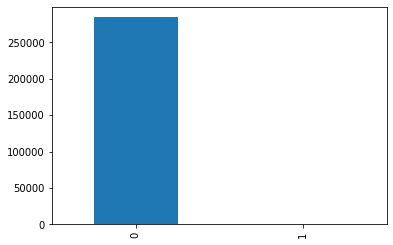

In [45]:
data.iloc[:,-1].value_counts().plot(kind='bar')

In [46]:
data.iloc[:,-1].value_counts() / data.iloc[:,-1].count() * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [0]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [49]:
print(y_train.value_counts() / y_train.count() * 100)
print(y_test.value_counts() / y_test.count() * 100)

0    99.826315
1     0.173685
Name: Class, dtype: float64
0    99.830061
1     0.169939
Name: Class, dtype: float64


In [0]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred, average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))

In [0]:
def modeling(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    metrics(y_test, pred)

In [52]:
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.73, 재현율 : 0.74
f1-score : 0.73, auc : 0.87


In [53]:
import lightgbm as li
lgb = li.LGBMClassifier(n_extimators=1000, num_leaves=64, n_job=-1, boost_from_average=False)
modeling(lgb, X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.97, 재현율 : 0.81
f1-score : 0.88, auc : 0.90


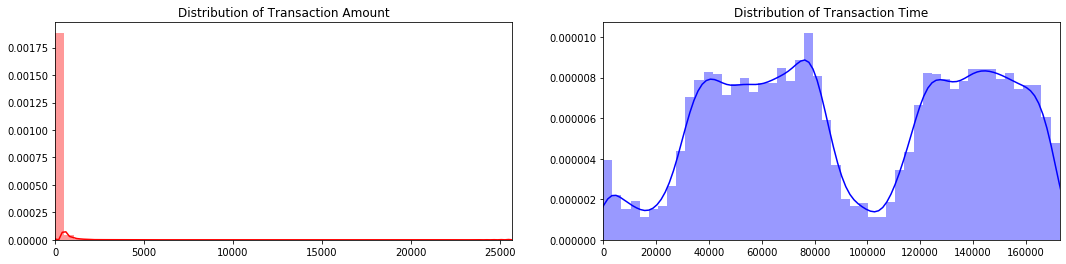

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title("Distribution of Transaction Amount")
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title("Distribution of Transaction Time")
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

# Amount 컬럼 Data normalization

In [0]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['loged_amount'] = np.log1p(data['Amount'].values.reshape(-1, 1))

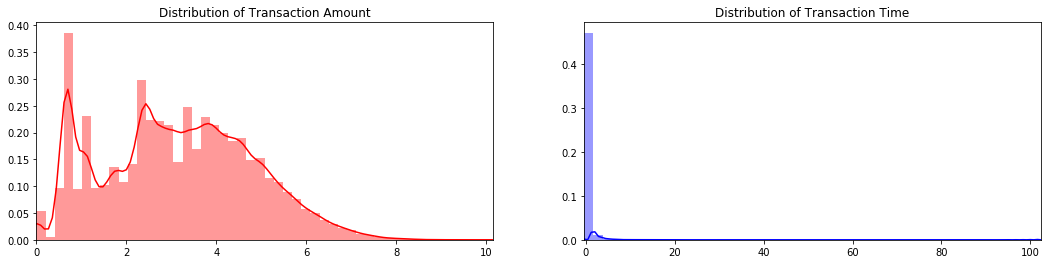

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
loged_amount = data['loged_amount'].values
scaled_amount = data['scaled_amount'].values

sns.distplot(loged_amount, ax=ax[0], color='r')
ax[0].set_xlim([min(loged_amount), max(loged_amount)])

sns.distplot(scaled_amount, ax=ax[1], color='b')
ax[1].set_xlim([min(scaled_amount), max(scaled_amount)])

plt.show()

In [0]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data['loged_time'] = np.log1p(data['Time'].values.reshape(-1,1))
data['std_time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

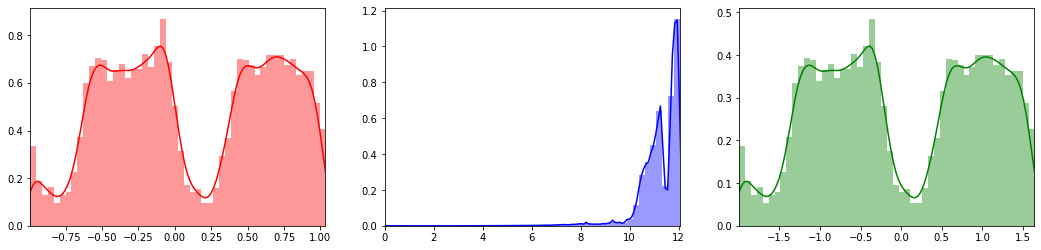

In [63]:
fig, ax = plt.subplots(1,3, figsize=(18, 4))
scaled_time = data['scaled_time'].values
loged_time = data['loged_time'].values
std_time = data['std_time'].values

sns.distplot(scaled_time, ax=ax[0], color='r')
ax[0].set_xlim([min(scaled_time), max(scaled_time)])

sns.distplot(loged_time, ax=ax[1], color='b')
ax[1].set_xlim([min(loged_time), max(loged_time)])

sns.distplot(std_time, ax=ax[2], color='g')
ax[2].set_xlim([min(std_time), max(std_time)])

plt.show()

# 정규화 후 데이터

In [64]:
data.drop(['loged_time', 'std_time', 'loged_amount', 'Time', 'Amount'], axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-0.994960


In [65]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']
data.drop(['scaled_time', 'scaled_amount'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)
data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [0]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [69]:
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.87, 재현율 : 0.65
f1-score : 0.75, auc : 0.83


In [70]:
lgb = li.LGBMClassifier(n_extimators=1000, num_leaves=64, n_job=-1, boost_from_average=False)
modeling(lgb, X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.96, 재현율 : 0.81
f1-score : 0.88, auc : 0.90


# 이상치 데이터 탐지 및 제거

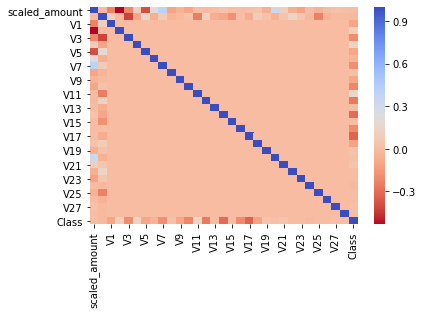

In [72]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

Text(0.5, 1.0, 'V14 vs Class')

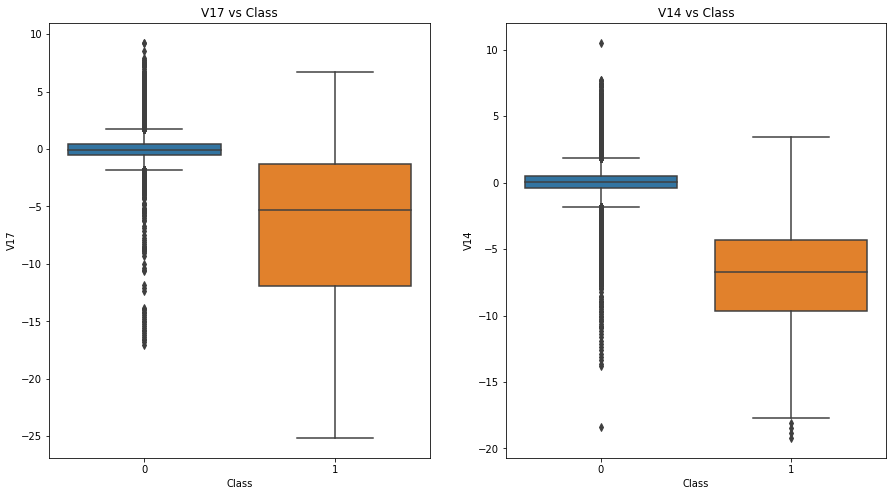

In [77]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x="Class", y="V17", data=data, ax=axes[0])
axes[0].set_title('V17 vs Class')

sns.boxplot(x="Class", y="V14", data=data, ax=axes[1])
axes[1].set_title('V14 vs Class')

Text(0.5, 1.0, 'V21 vs Class')

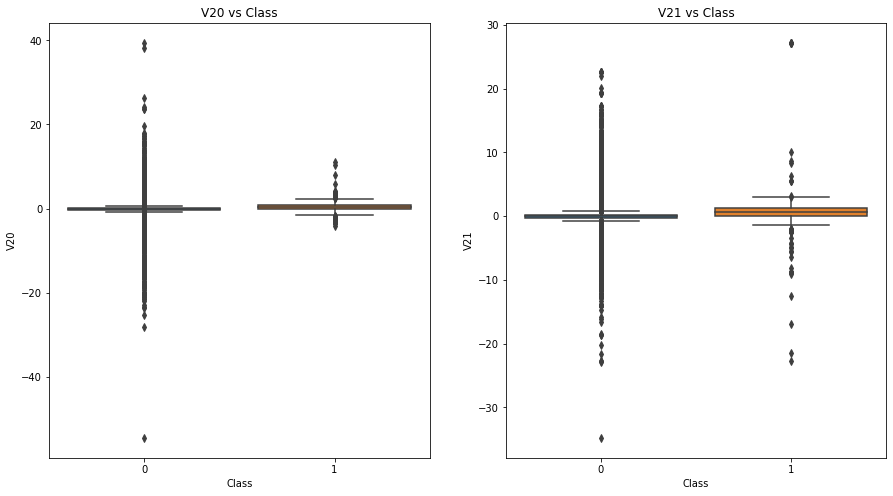

In [78]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x="Class", y="V20", data=data, ax=axes[0])
axes[0].set_title('V20 vs Class')

sns.boxplot(x="Class", y="V21", data=data, ax=axes[1])
axes[1].set_title('V21 vs Class')

In [0]:
data_copy = data.copy()

In [0]:
def remove_outlier_test(d_cp, column):
    fraud_column_data = d_cp[d_cp['Class']==1][column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)

    iqr = quan_75 - quan_25
    iqr = iqr * 1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis = 0, inplace=True)
    print(d_cp.shape)
    return d_cp


In [91]:
data_copy = remove_outlier_test(data_copy, 'V14')

4
(284803, 31)


In [0]:
X = data_copy.iloc[:, :-1]
y = data_copy.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [93]:
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.89, 재현율 : 0.57
f1-score : 0.70, auc : 0.79


In [94]:
lgb = li.LGBMClassifier(n_extimators=1000, num_leaves=64, n_job=-1, boost_from_average=False)
modeling(lgb, X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.96, 재현율 : 0.76
f1-score : 0.85, auc : 0.88
